<a href="https://colab.research.google.com/github/tcuongg/3.6/blob/main/3_6TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as stats

In [32]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks
df = pd.read_csv('PRSA_data.csv')
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [50]:
# Kết hợp các cột thời gian thành datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

# Chọn chuỗi thời gian pm2.5 và loại bỏ giá trị thiếu
ts = df['pm2.5'].dropna()

In [ ]:
# Xây mô hình ARIMA(p,d,q) với thông số thử nghiệm (p=1,d=1,q=1)
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

In [58]:
# AIC, BIC càng thấp càng tốt. P-value của các hệ số nên < 0.05
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  pm2.5   No. Observations:                41757
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -192180.294
Date:                Tue, 03 Jun 2025   AIC                         384366.588
Time:                        10:55:37   BIC                         384392.507
Sample:                             0   HQIC                        384374.776
                              - 41757                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0780      0.007    -11.090      0.000      -0.092      -0.064
ma.L1          0.2587      0.007     39.218      0.000       0.246       0.272
sigma2       582.3816      0.658    884.764      0.0

In [54]:
residuals = model_fit.resid

In [55]:
adf_result = adfuller(residuals)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -36.36802718985728
p-value: 0.0


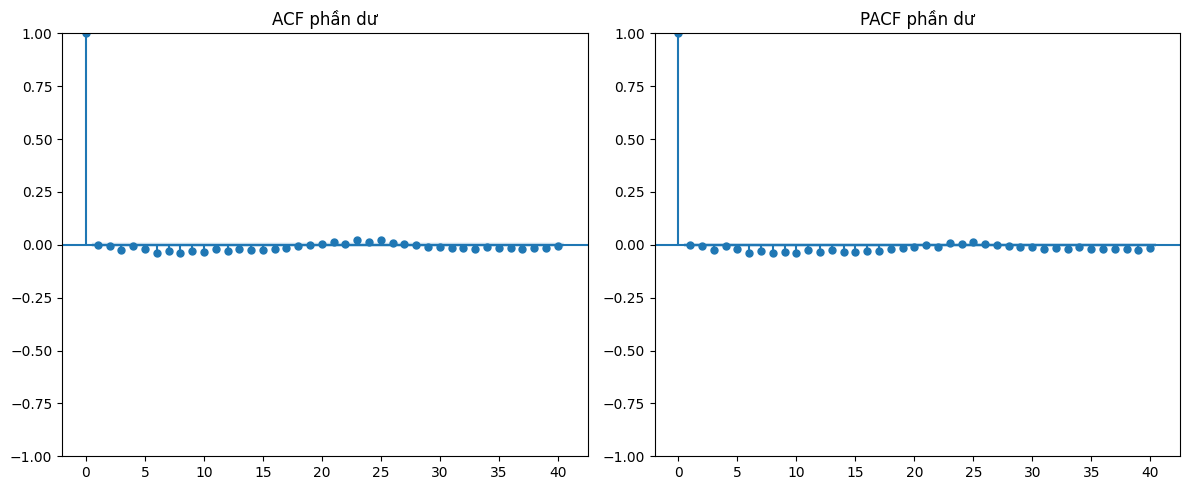

In [56]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF phần dư')

plt.subplot(1, 2, 2)
plot_pacf(residuals, ax=plt.gca(), lags=40)
plt.title('PACF phần dư')

plt.tight_layout()
plt.show()